In [1]:
from astropy.io import fits
import pandas as pd
from gatspy import periodic
import numpy as np
import matplotlib.pyplot as plt
plt.rc('xtick',c='w')
plt.rc('ytick',c='w')
from PyAstronomy import pyasl
from astropy.time import Time
import lightkurve as lk
from astropy import units as u
from astropy.modeling import Fittable1DModel, Parameter
from astropy.modeling import models, fitting
from matplotlib import gridspec
from lmfit import Parameters, minimize, report_fit, Model,fit_report
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from astropy.coordinates import ICRS
from pylab import rc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.timeseries import LombScargle
from matplotlib import transforms
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
from specutils.analysis import snr_derived
from scipy.stats import norm
from specutils import Spectrum1D, SpectralRegion

/home/nwal/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


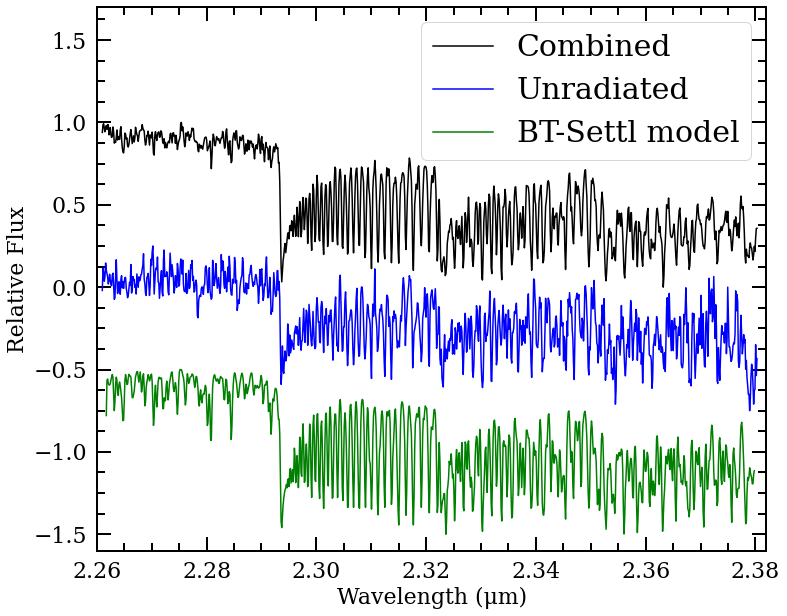

In [10]:
plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
rc('axes', linewidth=2)
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacShifts/coAddShifted.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]

fig, ax1 = plt.subplots(1, 1, figsize=(12,10))

ax1.plot(wvl/10000, normalizedCoadd, 'k-', label='Combined')

wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacNotRad/notRad.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]
ax1.plot(wvl/10000, normalizedCoadd-0.75, 'b-', label='Unradiated')


wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/Random-Astro-master/BTSettleT23005.5.fits')
ax1.plot(wvl/10000, flx-0.75-0.75, c='g', label='BT-Settl model')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
ax1.tick_params(axis='y',which='major', length=14,direction="in")
ax1.tick_params(axis='x',which='both', width=2,direction='in')
ax1.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.125))
ax1.tick_params(axis='x',which='minor', length=8)
ax1.tick_params(axis='y',which='minor', length=8,direction='in')
ax1.tick_params(labelsize=22)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(2.26, 2.382)
ax1.set_ylim(-1.6,1.7)
ax1.set_xlabel('Wavelength (μm)', fontsize=22)
ax1.set_ylabel('Relative Flux', fontsize=22)
ax1.legend(prop={'size': 30},loc='upper right')
bboxx = transforms.Bbox([[0.24, 0.1], [11, 8.9]])
plt.savefig('GD1400RefFigure.pdf', bbox_inches=bboxx)
#phases 0.4-0.6

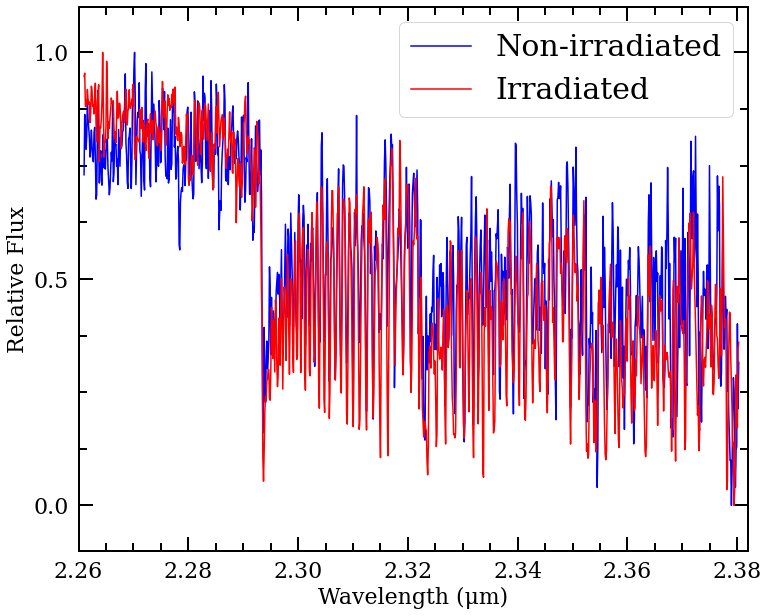

In [4]:
plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
rc('axes', linewidth=2)

fig, ax1 = plt.subplots(1, 1, figsize=(12,10))
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacNotRad/notRad.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]
ax1.plot(wvl/10000, normalizedCoadd, 'b-', label='Non-irradiated')


wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacRad/Rad.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]
ax1.plot(wvl/10000, normalizedCoadd, 'r-', label='Irradiated')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
ax1.tick_params(axis='y',which='major', length=14,direction="in")
ax1.tick_params(axis='x',which='both', width=2,direction='in')
ax1.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.125))
ax1.tick_params(axis='x',which='minor', length=8)
ax1.tick_params(axis='y',which='minor', length=8,direction='in')
ax1.tick_params(labelsize=22)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(2.26, 2.382)
ax1.set_ylim(-0.1,1.1)
ax1.set_xlabel('Wavelength (μm)', fontsize=22)
ax1.set_ylabel('Relative Flux', fontsize=22)
ax1.legend(prop={'size': 30},loc='upper right')
bboxx = transforms.Bbox([[0.24, 0.1], [11, 8.9]])
plt.savefig('GD1400RefFigure.pdf', bbox_inches=bboxx)
#phases 0.4-0.6

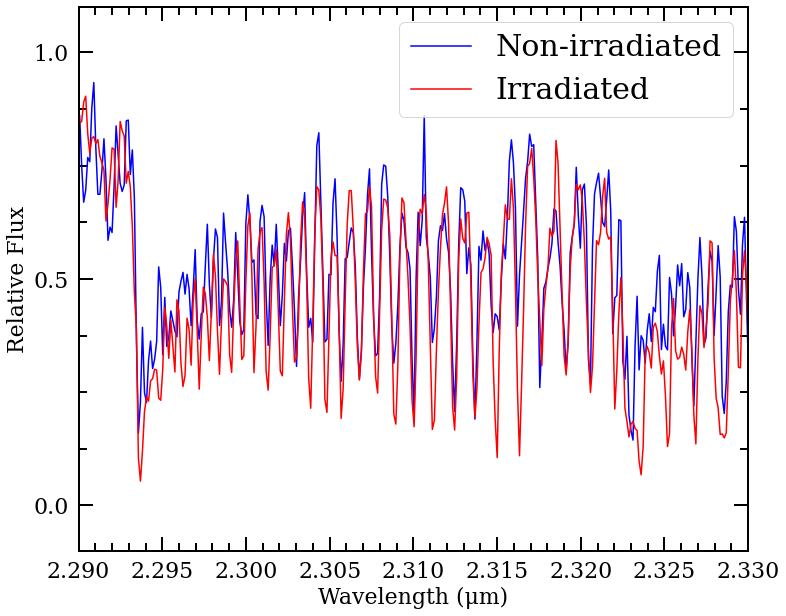

In [5]:
plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
rc('axes', linewidth=2)

fig, ax1 = plt.subplots(1, 1, figsize=(12,10))
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacNotRad/notRad.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]
ax1.plot(wvl/10000, normalizedCoadd, 'b-', label='Non-irradiated')


wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacRad/Rad.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]
ax1.plot(wvl/10000, normalizedCoadd, 'r-', label='Irradiated')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
ax1.tick_params(axis='y',which='major', length=14,direction="in")
ax1.tick_params(axis='x',which='both', width=2,direction='in')
ax1.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.125))
ax1.tick_params(axis='x',which='minor', length=8)
ax1.tick_params(axis='y',which='minor', length=8,direction='in')
ax1.tick_params(labelsize=22)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(2.29, 2.33)
ax1.set_ylim(-0.1,1.1)
ax1.set_xlabel('Wavelength (μm)', fontsize=22)
ax1.set_ylabel('Relative Flux', fontsize=22)
ax1.legend(prop={'size': 30},loc='upper right')
bboxx = transforms.Bbox([[0.24, 0.1], [11, 8.9]])
plt.savefig('GD1400RefFigureZoomed.pdf', bbox_inches=bboxx)
#phases 0.4-0.6

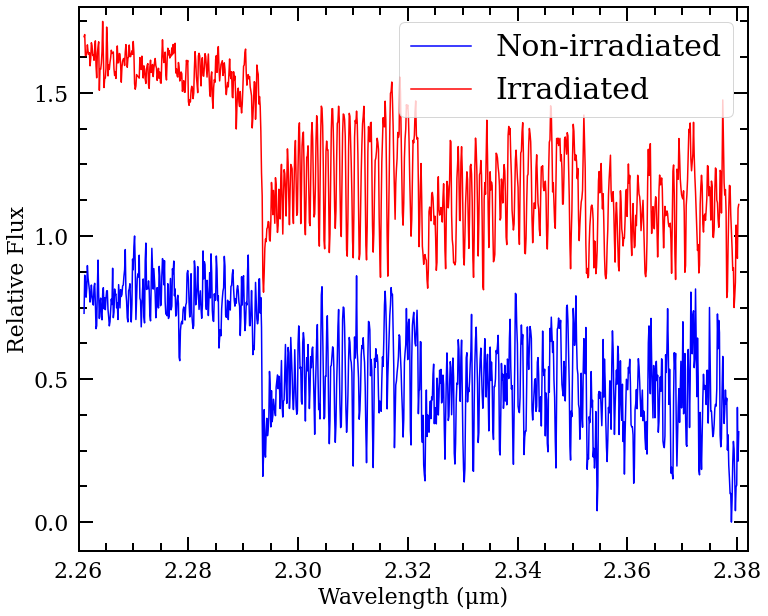

In [8]:
plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
rc('axes', linewidth=2)

fig, ax1 = plt.subplots(1, 1, figsize=(12,10))
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacNotRad/notRad.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]
ax1.plot(wvl/10000, normalizedCoadd, 'b-', label='Non-irradiated')


wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacRad/Rad.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]
ax1.plot(wvl/10000, normalizedCoadd+0.75, 'r-', label='Irradiated')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
ax1.tick_params(axis='y',which='major', length=14,direction="in")
ax1.tick_params(axis='x',which='both', width=2,direction='in')
ax1.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.125))
ax1.tick_params(axis='x',which='minor', length=8)
ax1.tick_params(axis='y',which='minor', length=8,direction='in')
ax1.tick_params(labelsize=22)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(2.26, 2.382)
ax1.set_ylim(-0.1,1.8)
ax1.set_xlabel('Wavelength (μm)', fontsize=22)
ax1.set_ylabel('Relative Flux', fontsize=22)
ax1.legend(prop={'size': 30},loc='upper right')
bboxx = transforms.Bbox([[0.24, 0.1], [11, 8.9]])
plt.savefig('GD1400RefFigure.pdf', bbox_inches=bboxx)
#phases 0.4-0.6

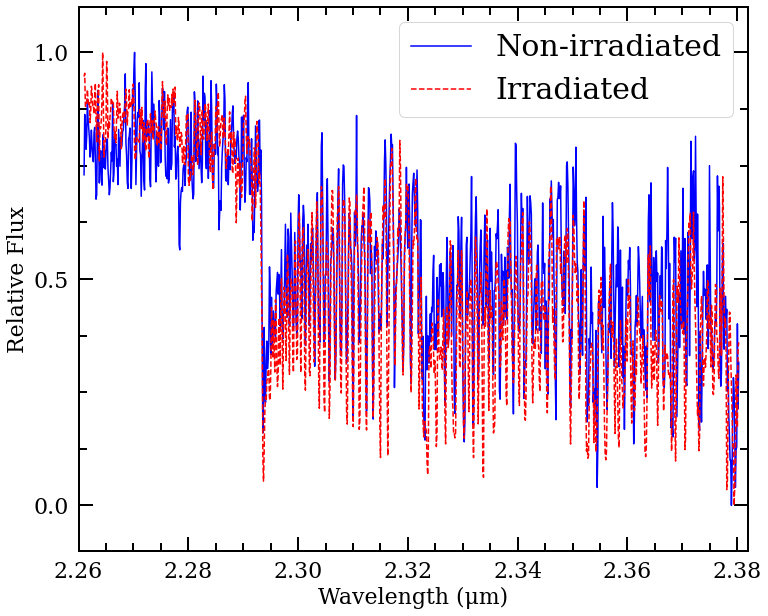

In [11]:
plt.rc('xtick',c='k')
plt.rc('ytick',c='k')
rc('axes', linewidth=2)

fig, ax1 = plt.subplots(1, 1, figsize=(12,10))
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacNotRad/notRad.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]
ax1.plot(wvl/10000, normalizedCoadd, 'b-', label='Non-irradiated')


wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacRad/Rad.fits')
flx = flx/np.median(flx)
normalizedCoadd= flx
normalizedCoadd = normalizedCoadd[:-22]
normalizedCoadd = (normalizedCoadd-min(normalizedCoadd))/(max(normalizedCoadd)-min(normalizedCoadd))
place=22
wvl = wvl[:-place]
ax1.plot(wvl/10000, normalizedCoadd, 'r--', label='Irradiated')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(axis='y',which='both', width=2,direction="in",pad=10)
ax1.tick_params(axis='y',which='major', length=14,direction="in")
ax1.tick_params(axis='x',which='both', width=2,direction='in')
ax1.tick_params(axis='x',which='major', length=14,direction='in',pad=10)
#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.125))
ax1.tick_params(axis='x',which='minor', length=8)
ax1.tick_params(axis='y',which='minor', length=8,direction='in')
ax1.tick_params(labelsize=22)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(2.26, 2.382)
ax1.set_ylim(-0.1,1.1)
ax1.set_xlabel('Wavelength (μm)', fontsize=22)
ax1.set_ylabel('Relative Flux', fontsize=22)
ax1.legend(prop={'size': 30},loc='upper right')
bboxx = transforms.Bbox([[0.24, 0.1], [11, 8.9]])
plt.savefig('GD1400RefFigure2.pdf', bbox_inches=bboxx)
#phases 0.4-0.6

In [3]:
wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacNotRad/notRad.fits')
spectrum = Spectrum1D(spectral_axis=wvl* u.AA, flux=flx* u.Jy)
der = snr_derived(spectrum)
print(der)

wvl, flx = pyasl.read1dFitsSpec('/home/nwal/Desktop/GD1400/isaacRad/Rad.fits')
spectrum = Spectrum1D(spectral_axis=wvl* u.AA, flux=flx* u.Jy)
der = snr_derived(spectrum)
print(der)

22.288700149261988
32.610888648305426
